In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime
import timeit

In [17]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images.shape

(60000, 28, 28)

In [28]:
test_images.shape

(10000, 28, 28)

In [27]:
len(train_labels)

60000

In [29]:
len(test_labels)

10000

In [21]:
train_images[0].shape

(28, 28)

In [22]:
train_images[0][0].shape

(28,)

In [23]:
train_images[0][0][0].shape

()

In [24]:
abc = [[[1, 2], [3, 4], [5, 6]], [[7, 8], [9, 10], [11, 12]]]

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
fashion_mnist_log_dir = "logs/fashion-mnist/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=fashion_mnist_log_dir, histogram_freq=1)

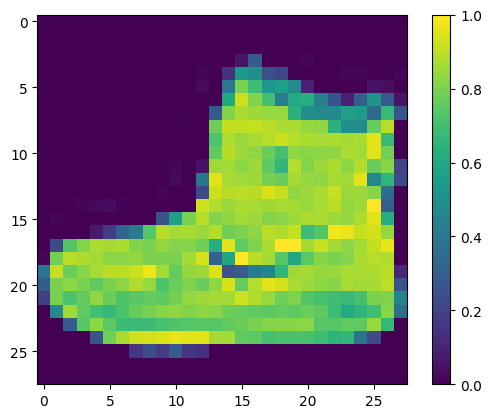

In [59]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
train_images = train_images / 255.0
test_images = test_images / 255.0

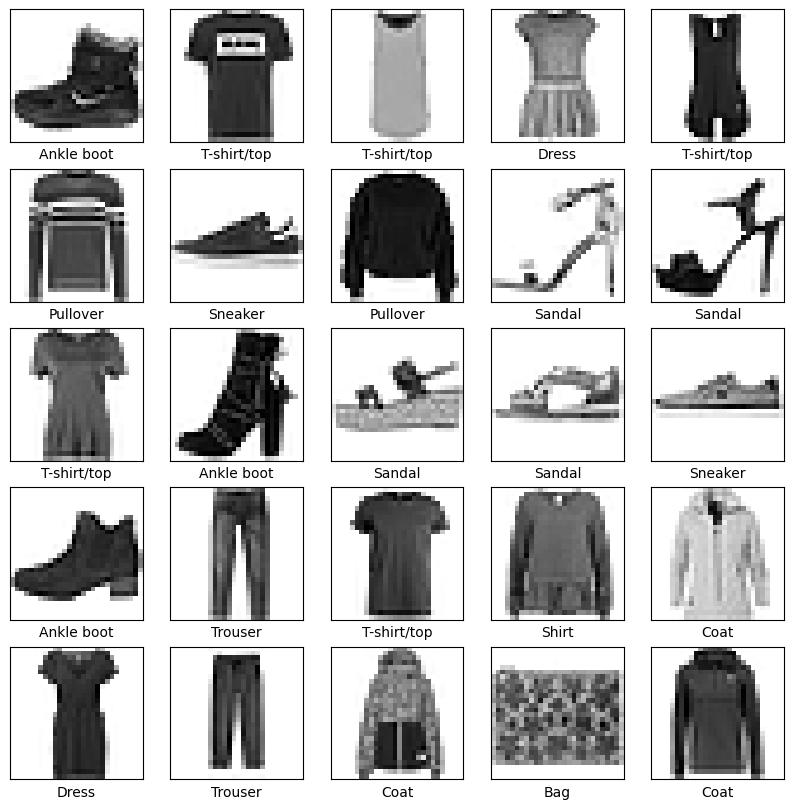

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
#model.fit(train_images, train_labels, epochs=10)
model.fit(x=train_images, 
          y=train_labels, 
          epochs=10, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0896 - accuracy: 0.6665 - val_loss: 0.7187 - val_accuracy: 0.7446
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6406 - accuracy: 0.7703 - val_loss: 0.6083 - val_accuracy: 0.7798
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5648 - accuracy: 0.7973 - val_loss: 0.5589 - val_accuracy: 0.8005
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5221 - accuracy: 0.8151 - val_loss: 0.5274 - val_accuracy: 0.8096
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4944 - accuracy: 0.8256 - val_loss: 0.5083 - val_accuracy: 0.8202
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4747 - accuracy: 0.8333 - val_loss: 0.4918 - val_accuracy: 0.8242
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4594 - accuracy: 0.8388 - val_loss: 0.4832 - val_accuracy:

In [65]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4571 - accuracy: 0.8361 - 290ms/epoch - 926us/step

Test accuracy: 0.8360999822616577


In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
models_dir = r'./fashion-models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [68]:
model.save(models_dir + '/fashion_mnist_model')

INFO:tensorflow:Assets written to: ./fashion-models/fashion_mnist_model\assets


INFO:tensorflow:Assets written to: ./fashion-models/fashion_mnist_model\assets


In [69]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [70]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 880us/step


In [71]:
predictions[0]

array([1.3676851e-06, 1.0930612e-08, 9.4818361e-06, 7.3156275e-06,
       7.0351825e-06, 1.9010635e-01, 4.8236296e-05, 2.6797035e-01,
       5.8462131e-03, 5.3600359e-01], dtype=float32)

In [72]:
np.argmax(predictions[0])

9

In [73]:
test_labels[0]

9

In [74]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


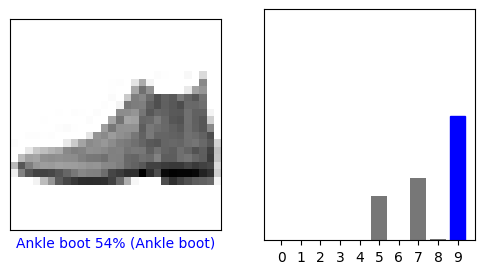

In [75]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

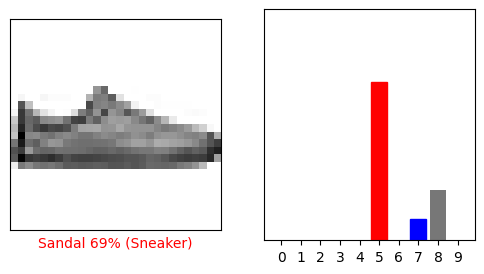

In [76]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

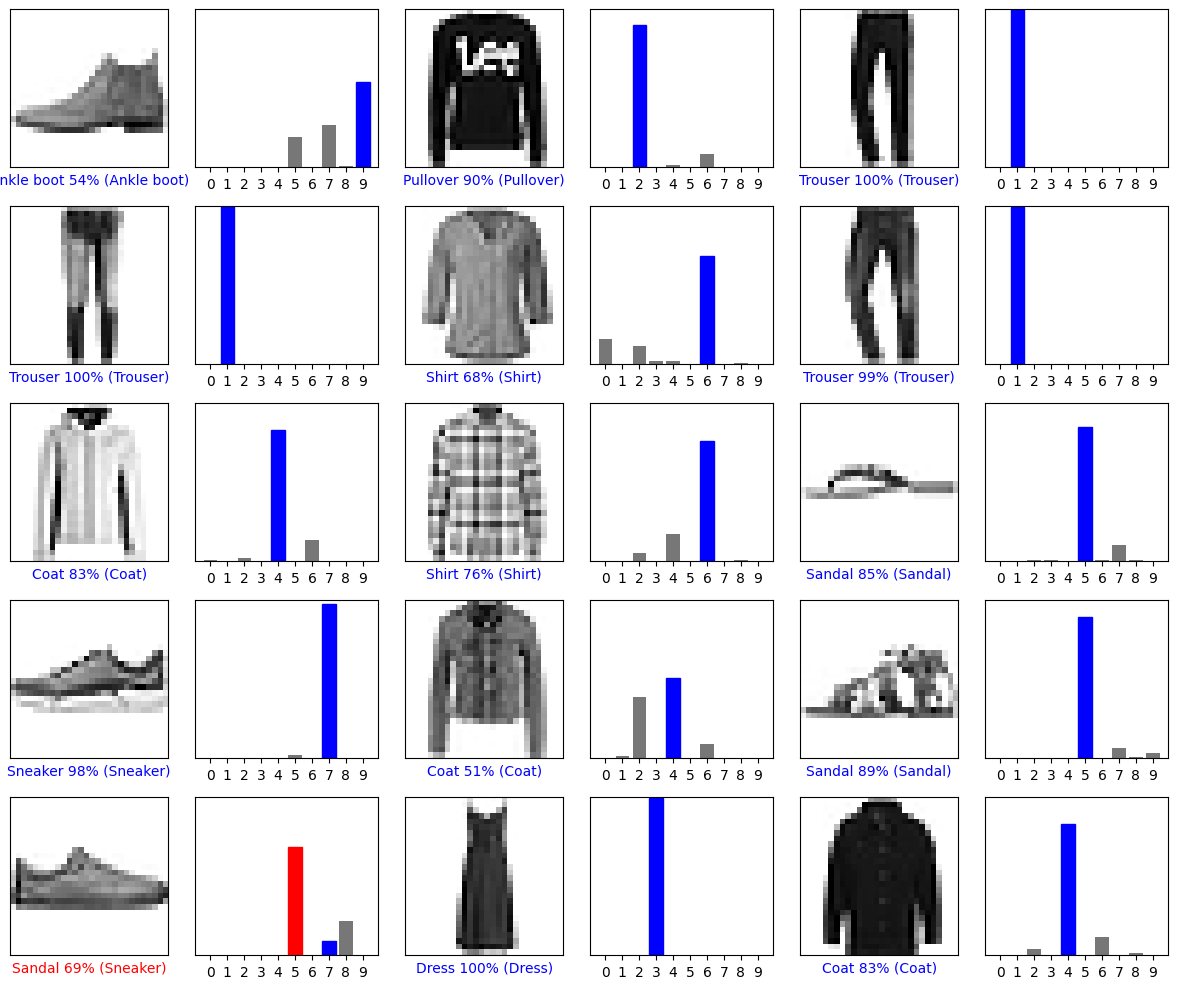

In [77]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [78]:
img = test_images[1]
print(img.shape)

(28, 28)


In [79]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [80]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[4.7418580e-04 8.0546788e-06 8.9750981e-01 5.4029417e-05 1.6014343e-02
  1.1188461e-10 8.5862562e-02 1.3335159e-15 7.6916105e-05 1.2471795e-11]]


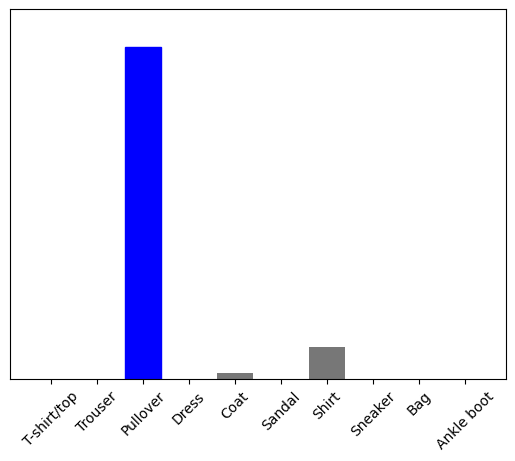

In [81]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [82]:
np.argmax(predictions_single[0])

2

In [56]:
%load_ext tensorboard

In [57]:
%tensorboard --logdir logs/fashion-mnist/fit